In [66]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import PQR, PDB
from MDAnalysis.analysis import density
import MDAnalysis.analysis.diffusionmap as diffusionmap

import numpy as np
import matplotlib.pyplot as plt
import nglview as nv
import time
import math
%matplotlib inline

## Ensayo : Cambio en la energía a medida se aumenta de tamaño la caja de observación.

In [2]:
def espaciam(dx,dime,long_maxima): #Esta función genera el vector espaciamiento del borde de la caja a la molécula
    t = ((dime - np.ones(len(dime)))*dx)-long_maxima
    while t[0]<0: 
        t = t[1:] 
    return t  
    
def deltaensayo2(dime, long_maxima, tol_pared, tol_espac): #Busca un delta_x, lo más cercano a la caja para el ensayo 
    i=0
    t = (np.ones(len(dime))*(long_maxima+tol_pared))/dime
    while t[i]>tol_espac:
        i = i+1
    return t[i],dime[i]

In [9]:
cmax = np.array([46.124, 45.268, 36.251])  #Max atom coordinate 
cmin = np.array([15.44, 12.896, -0.366])  #Min atom coordinate 
long_maxima = np.max(cmax-cmin)
dime = np.array([65,97,129,161,193,225,257,289])
tol_pared = 2 #tolerancia de 2A, 1A desde cada borde de la longitud de máximo tamaño.
tol_espac = 1 #Tolerancia de espaciamiento nano

In [8]:
dx,dime_0 = deltaensayo2(dime, long_maxima, tol_pared, tol_espac) #(0.7032977777777777 225 )
espaciamiento = espaciam(dx,dime,long_maxima) #[ 0.64835111 11.90111556 23.15388]
espaciamiento = 0.5*espaciamiento
print(dx,dime_0,espaciamiento)

0.6094923076923077 65 [ 1.19525385 10.94713077 20.69900769 30.45088462 40.20276154 49.95463846
 59.70651538 69.45839231]


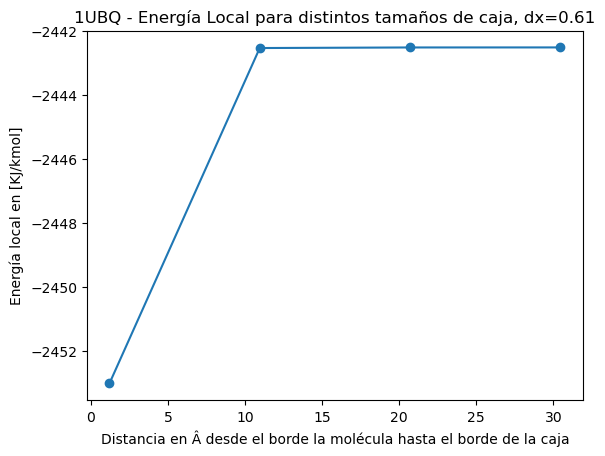

In [10]:
#Por medio de APBS para el dx obtenido se procede a determinar la energía de aumentar el tamaño de malla para los dimes establecidos. 
energy = np.array([round(-2.453010708088*10**3,4),round(-2.442542195892*10**3,4),round(-2.442524337115*10**3,4),round(-2.442523051576*10**3,4)]) # LPBL -2.071537130017E+05 NPBL -2.074439329577E+05 DIME:385 DX:0.5 
plt.scatter(espaciamiento[:-4], energy)
plt.plot(espaciamiento[:-4], energy)
plt.xlabel('Distancia en Â desde el borde la molécula hasta el borde de la caja')
plt.ylabel("Energía local en [KJ/kmol]")
plt.title('1UBQ - Energía Local para distintos tamaños de caja, dx=0.61')
plt.show()
#10A por lado es una distancia segura, 20A en total.

## ENSAYO 2 : Para una distancia segura de 20Â, análisis para dx variable. 

In [13]:
dime = np.array([65,97,129,161,193,225,257,289,321,353,385]) #Sumar 32
dist = 20#Â %Resultado del ensayo 1 
dx = (dist+long_maxima)*np.ones(len(dime))/dime
for i in range(len(dime)): 
    print(dime[i],dx[i])  
    #print(dx[i])

65 0.8710307692307692
97 0.583680412371134
129 0.43889147286821706
161 0.35165838509316766
193 0.2933523316062176
225 0.2516311111111111
257 0.22029961089494163
289 0.19590657439446366
321 0.17637694704049844
353 0.16038810198300282
385 0.14705714285714286


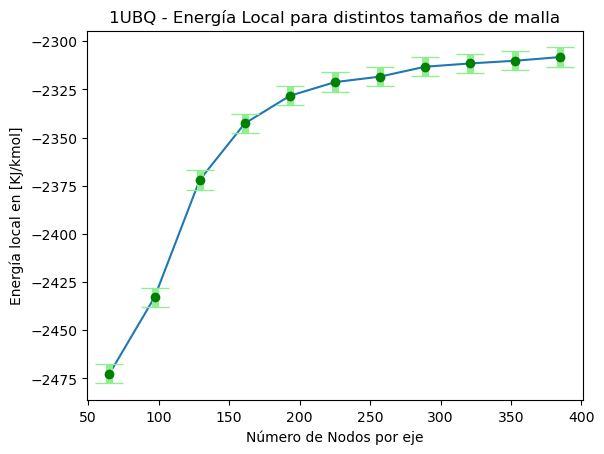

In [23]:
dime = np.array([65,97,129,161,193,225,257,289,321,353,385])#,577,1473]) 385-0.5 #No tengo RAM para ver malla media y fina 
energy = np.array([-2.472643221029*10**3,-2.432935554860*10**3,-2.372091505511*10**3,-2.342717874471*10**3,-2.328369872932*10**3,-2.321257415511*10**3,-2.318399904203*10**3,-2.313269292305*10**3,-2.311551885009*10**3,-2.310148986883*10**3,-2.308243451118*10**3]) #Me detengo en 385, porque el peso del archivo de texto estaba en los 4.4 GB
plt.plot(dime, energy)
plt.errorbar(dime,energy, yerr = 5, fmt = 'o',color = 'green', ecolor = 'lightgreen', elinewidth = 5, capsize=10)
plt.xlabel('Número de Nodos por eje')
plt.ylabel("Energía local en [KJ/kmol]")
plt.title('1UBQ - Energía Local para distintos tamaños de malla')
plt.show()

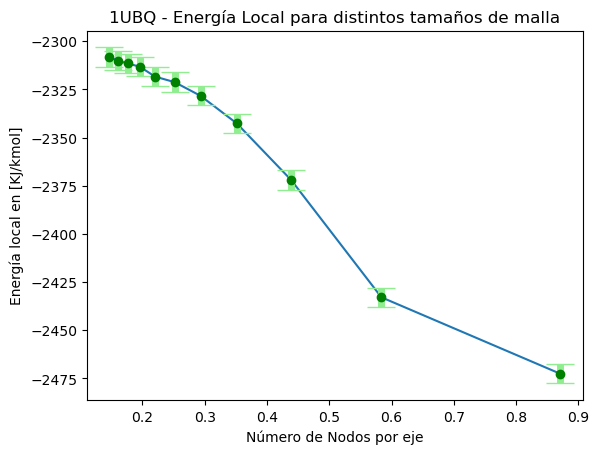

In [22]:
dime = np.array([65,97,129,161,193,225,257,289,321,353,385])#,577,1473]) 385-0.5 #No tengo RAM para ver malla media y fina 
energy = np.array([-2.472643221029*10**3,-2.432935554860*10**3,-2.372091505511*10**3,-2.342717874471*10**3,-2.328369872932*10**3,-2.321257415511*10**3,-2.318399904203*10**3,-2.313269292305*10**3,-2.311551885009*10**3,-2.310148986883*10**3,-2.308243451118*10**3]) #Me detengo en 385, porque el peso del archivo de texto estaba en los 4.4 GB
plt.plot(dx, energy)
plt.errorbar(dx,energy, yerr = 5, fmt = 'o',color = 'green', ecolor = 'lightgreen', elinewidth = 5, capsize=10)
plt.xlabel('Número de Nodos por eje')
plt.ylabel("Energía local en [KJ/kmol]")
plt.title('1UBQ - Energía Local para distintos tamaños de malla')
plt.show()

## Ensayo de Cortes

In [69]:
#Importamos los archivos .dx asociados a las potencias totales
from gridData import Grid 
lineal = Grid("1ubq-PotTol-l.dx")  # Potencia Total
vacc_l = Grid("1ubq-PotVacc-l.dx") #Potencial en vacío
reac = lineal - vacc_l
nolineal = Grid("1ubq-PotTol-nl.dx")  # Potencia Total
lnl = lineal - nolineal #Isopotencia, tanto de reacción como total
kappa = Grid("kappa-1ubq-PE0.dx")

from gridData import Grid 
lnl.export("1ubq-lnl.dx")
reac.export("1ubq-reac.dx")

In [3]:
#función que saca los vertices en un plano definido con un margen definido.
def verticesenplano(Valor,CorteX,CorteY,CorteZ,archivovert): #Completar los Cortes con False o True 
    with open(archivovert,"r") as archivo:
        data = []
        for linea in archivo:
            #linea = linea.replace('   -','    -')
            a0,a1,a2= np.float_(linea.replace('   -','    -')[2:].split('   ')[:3]) #Genero una tupla de 4 elementos, 3 potenciales en formato texto y un salto de linea(que se elimina) luego se convierte en flotante.
            if CorteX == True:
                if (a0 >= Valor-0.5) and (a0 <= Valor+0.5): #Tomamos todos los vertices a una distancia de 2A del 
                    data.append([a0,a1,a2])
            if CorteY == True:
                if (a1 >= Valor-0.5) and (a1 <= Valor+0.5):
                    data.append([a0,a1,a2])
            if CorteZ == True:
                if (a2 >= Valor-0.5) and (a2 <= Valor+0.5):
                    data.append([a0,a1,a2])
        data2 = np.array(data)
        return data2   

### Potencial Total Lineal

In [28]:
print(np.min(lineal.grid))
print(np.max(lineal.grid))

-2460.289
2094.473


In [29]:
#Máximos locales para npt particiones 
max_values = []
x_v, y_v, z_v = [],[],[]
dime = 321
npt = 1 #número de particiones por lado (2->8 3->27 cubos)
factor = np.floor_divide(dime,npt)
for i in range(0,dime,factor):
    for j in range(0,dime,factor):
        for k in range(0,dime,factor):
            max_local =np.max(lineal.grid[i:(i+factor),j:(j+factor),k:(k+factor)]) #**
            min_local =np.min(lineal.grid[i:(i+factor),j:(j+factor),k:(k+factor)]) #**
            maxx = np.max(lineal.grid)  #**
            minn = np.min(lineal.grid)  #**
            if max_local>=0.7*maxx:
                b,n,m = np.where(lineal.grid == max_local)  #**
                x_v.append(int(b))
                y_v.append(int(n))
                z_v.append(int(m))
            if min_local<=0.7*minn:
                b,n,m = np.where(lineal.grid == min_local)  #**
                x_v.append(int(b))
                y_v.append(int(n))
                z_v.append(int(m))
max_values = np.array(x_v),np.array(y_v),np.array(z_v)
print(max_values)

(array([139, 143]), array([179, 157]), array([209, 210]))


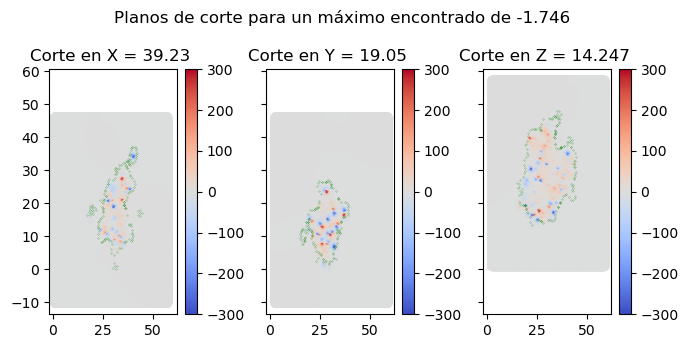

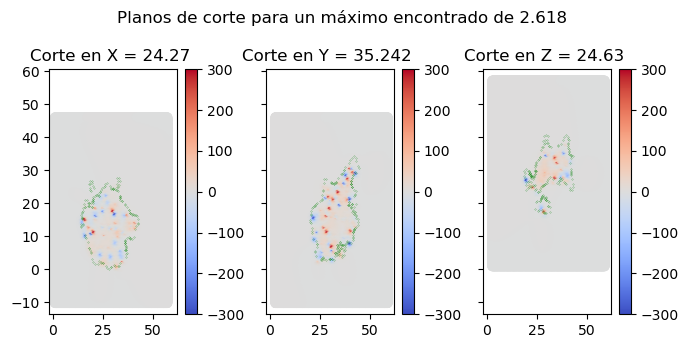

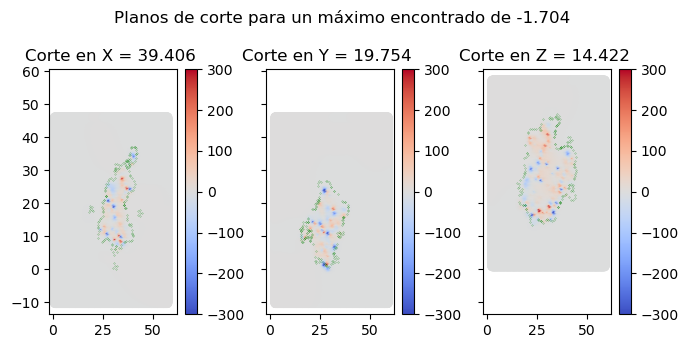

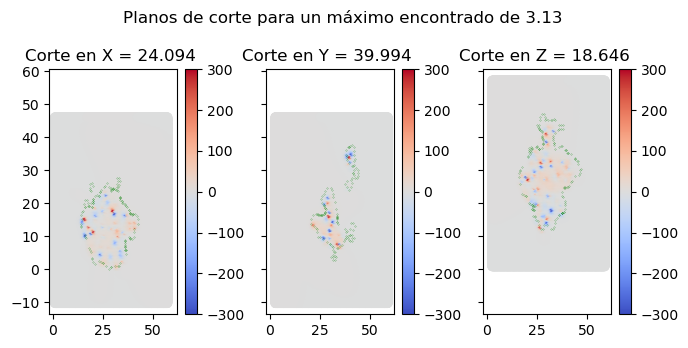

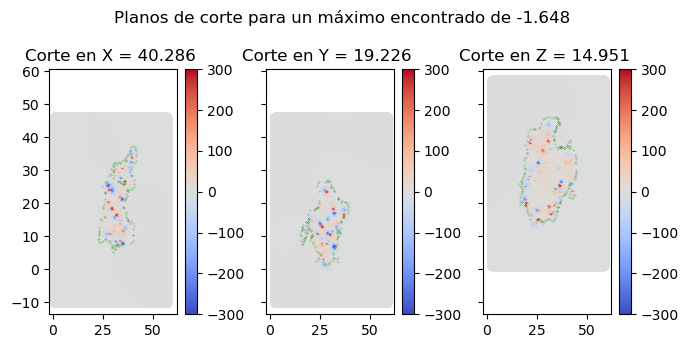

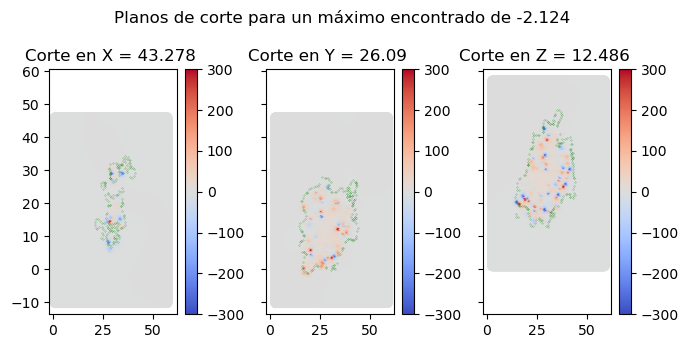

In [13]:
##Código de plotep
##Condiciones Iniciales
origen = lineal.origin 
delta = lineal.delta
x = lineal.midpoints[0] 
y = lineal.midpoints[1] 
z = lineal.midpoints[2] 
Yx,Zx = np.meshgrid(y, z)
Xy,Zy = np.meshgrid(x, z)
Xz,Yz = np.meshgrid(x, y)
#Iteración sobre cada valor máximo 
for i in range(len(max_values[0])):
    x_plane, y_plane, z_plane = [],[],[]
    #Clasificación de cada plano de corte en el valor máximo 
    for j in range(len(lineal.grid[0,0,:])):
        x_plane.append(lineal.grid[max_values[0][i],:,j])
        y_plane.append(lineal.grid[:, max_values[1][i],j])
        z_plane.append(lineal.grid[:,j,max_values[2][i]])
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
    ax1, ax2, ax3 = axes.flatten()
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    maximo_0 = lineal.grid[max_values[0][i],max_values[1][i],max_values[2][i]]
    fig.suptitle('Planos de corte para un máximo encontrado de {} '.format(round(maximo_0,3), fontsize=16))
    #Plano de Corte en X 
    plt.subplot(1, 3, 1)
    Eje = max_values[0][i]
    Coord = Eje*delta[0] + origen[0]
    data = verticesenplano(Coord,True,False,False,"1ubq.vert")
    ax1.set_title("Corte en X = {} ".format(round(Coord,3)))
    plt.plot(data[:,1],data[:,2],'o',markersize=0.15, color = "green")
    ax1 = plt.scatter(Yx,Zx,c=np.array(x_plane), cmap='coolwarm',vmin=-300,vmax=300)
    #plt.plot(data[:,1],data[:,2],'o',markersize=0.25, color = "white")
    plt.colorbar(ax1)
    #Plano de Corte en Y
    plt.subplot(1, 3, 2)
    Eje = max_values[1][i]
    Coord = Eje*delta[1] + origen[1]
    data = verticesenplano(Coord,False,True,False,"1ubq.vert")
    ax2.set_title("Corte en Y = {} ".format(round(Coord,3)))
    plt.plot(data[:,0],data[:,2],'o',markersize=0.15, color = 'green')
    ax2 = plt.scatter(Xy,Zy,c=np.array(y_plane), cmap='coolwarm',vmin=-300,vmax=300) #plt.imshow(y_plane, cmap="autumn",vmin=np.min(lnl.grid),vmax=np.max(lnl.grid))
    #plt.plot(data[:,0],data[:,2],'o',markersize=0.25, color = 'green')
    plt.colorbar(ax2)
    #Plano de Corte en Z
    plt.subplot(1, 3, 3)
    Eje = max_values[2][i]
    Coord = Eje*delta[2] + origen[2]
    data = verticesenplano(Coord,False,False,True,"1ubq.vert")
    ax3.set_title("Corte en Z = {} ".format(round(Coord,3)))
    plt.plot(data[:,0],data[:,1],'o',markersize=0.15, color = 'green')
    ax3 = plt.scatter(Xz,Yz,c=np.array(z_plane), cmap='coolwarm',vmin=-300,vmax=300)#plt.imshow(z_plane, cmap="autumn",vmin=np.min(lnl.grid),vmax=np.max(lnl.grid))
    #plt.plot(data[:,0],data[:,1],'o',markersize=0.25, color = 'white')
    plt.colorbar(ax3)
    #Ploteo 
    plt.show()

### Potencia de Reacción Lineal

In [33]:
print(np.min(reac.grid))
print(np.max(reac.grid))

-168.19057
134.42753


In [41]:
#Máximos locales para npt particiones 
max_values = []
x_v, y_v, z_v = [],[],[]
dime = 321
npt = 1 #número de particiones por lado (2->8 3->27 cubos)
factor = np.floor_divide(dime,npt)
for i in range(0,dime,factor):
    for j in range(0,dime,factor):
        for k in range(0,dime,factor):
            max_local =np.max(reac.grid[i:(i+factor),j:(j+factor),k:(k+factor)]) #**
            min_local =np.min(reac.grid[i:(i+factor),j:(j+factor),k:(k+factor)]) #**
            maxx = np.max(reac.grid)  #**
            minn = np.min(reac.grid)  #**
            if max_local>=0.7*maxx:
                b,n,m = np.where(reac.grid == max_local)  #**
                x_v.append(int(b))
                y_v.append(int(n))
                z_v.append(int(m))
            if min_local<=0.7*minn:
                b,n,m = np.where(reac.grid == min_local)  #**
                x_v.append(int(b))
                y_v.append(int(n))
                z_v.append(int(m))
max_values = np.array(x_v),np.array(y_v),np.array(z_v)
print(max_values)

(array([203, 110]), array([ 91, 230]), array([162, 152]))


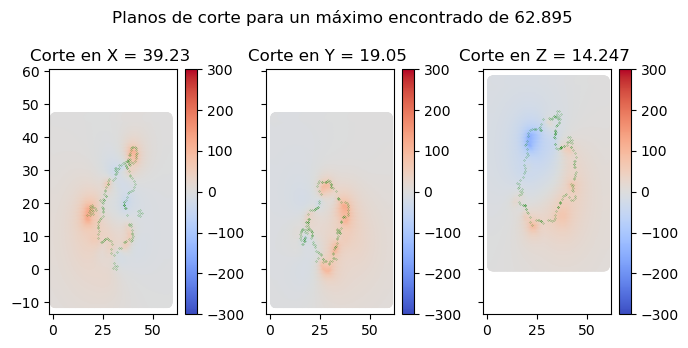

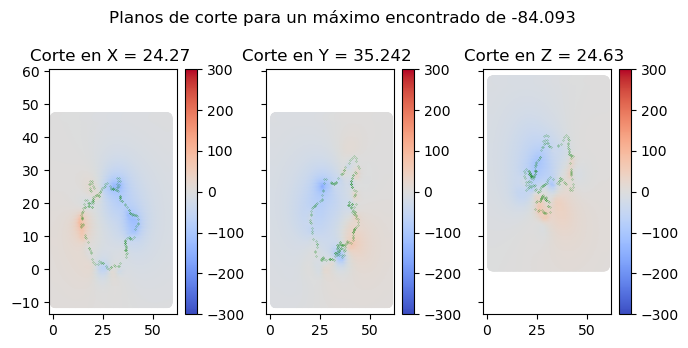

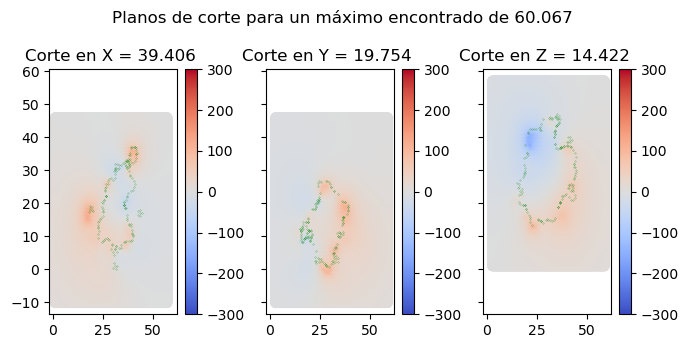

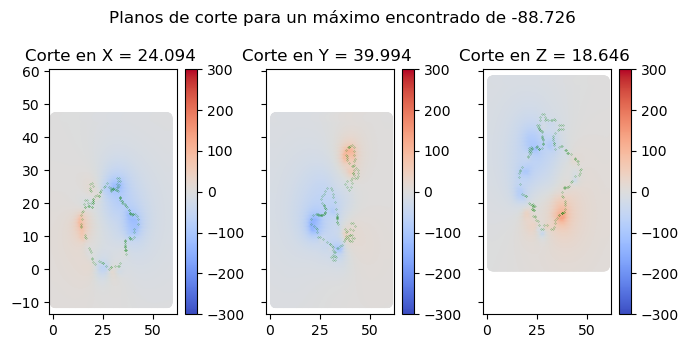

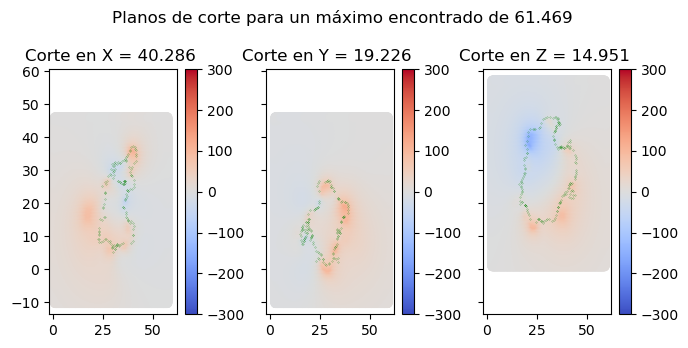

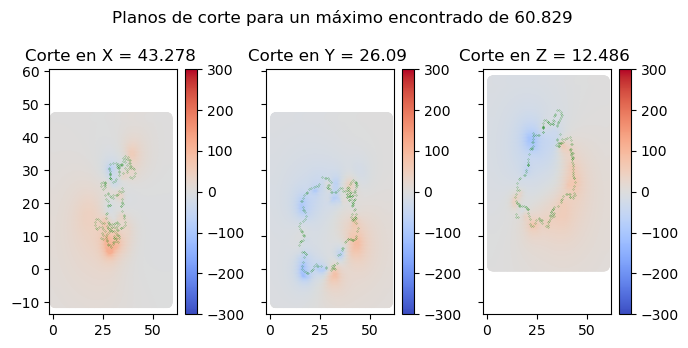

In [14]:
##Código de plotep
##Condiciones Iniciales
origen = reac.origin 
delta = reac.delta
x = reac.midpoints[0] 
y = reac.midpoints[1] 
z = reac.midpoints[2] 
Yx,Zx = np.meshgrid(y, z)
Xy,Zy = np.meshgrid(x, z)
Xz,Yz = np.meshgrid(x, y)
#Iteración sobre cada valor máximo 
for i in range(len(max_values[0])):
    x_plane, y_plane, z_plane = [],[],[]
    #Clasificación de cada plano de corte en el valor máximo 
    for j in range(len(reac.grid[0,0,:])):
        x_plane.append(reac.grid[max_values[0][i],:,j])
        y_plane.append(reac.grid[:, max_values[1][i],j])
        z_plane.append(reac.grid[:,j,max_values[2][i]])
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
    ax1, ax2, ax3 = axes.flatten()
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    maximo_0 = reac.grid[max_values[0][i],max_values[1][i],max_values[2][i]]
    fig.suptitle('Planos de corte para un máximo encontrado de {} '.format(round(maximo_0,3), fontsize=16))
    #Plano de Corte en X 
    plt.subplot(1, 3, 1)
    Eje = max_values[0][i]
    Coord = Eje*delta[0] + origen[0]
    data = verticesenplano(Coord,True,False,False,"1ubq.vert")
    ax1.set_title("Corte en X = {} ".format(round(Coord,3)))
    plt.plot(data[:,1],data[:,2],'o',markersize=0.15, color = "green")
    ax1 = plt.scatter(Yx,Zx,c=np.array(x_plane), cmap='coolwarm',vmin=-300,vmax=300)
    #plt.plot(data[:,1],data[:,2],'o',markersize=0.25, color = "white")
    plt.colorbar(ax1)
    #Plano de Corte en Y
    plt.subplot(1, 3, 2)
    Eje = max_values[1][i]
    Coord = Eje*delta[1] + origen[1]
    data = verticesenplano(Coord,False,True,False,"1ubq.vert")
    ax2.set_title("Corte en Y = {} ".format(round(Coord,3)))
    plt.plot(data[:,0],data[:,2],'o',markersize=0.15, color = 'green')
    ax2 = plt.scatter(Xy,Zy,c=np.array(y_plane), cmap='coolwarm',vmin=-300,vmax=300) #plt.imshow(y_plane, cmap="autumn",vmin=np.min(lnl.grid),vmax=np.max(lnl.grid))
    #plt.plot(data[:,0],data[:,2],'o',markersize=0.25, color = 'green')
    plt.colorbar(ax2)
    #Plano de Corte en Z
    plt.subplot(1, 3, 3)
    Eje = max_values[2][i]
    Coord = Eje*delta[2] + origen[2]
    data = verticesenplano(Coord,False,False,True,"1ubq.vert")
    ax3.set_title("Corte en Z = {} ".format(round(Coord,3)))
    plt.plot(data[:,0],data[:,1],'o',markersize=0.15, color = 'green')
    ax3 = plt.scatter(Xz,Yz,c=np.array(z_plane), cmap='coolwarm',vmin=-300,vmax=300)#plt.imshow(z_plane, cmap="autumn",vmin=np.min(lnl.grid),vmax=np.max(lnl.grid))
    #plt.plot(data[:,0],data[:,1],'o',markersize=0.25, color = 'white')
    plt.colorbar(ax3)
    #Ploteo 
    plt.show()

## Error Lineal - no lineal

In [4]:
print(np.min(lnl.grid))
print(np.max(lnl.grid))

-0.06514600000000015
0.17655200000000004


In [5]:
print(np.where(lnl.grid == np.max(lnl.grid)))

(array([122]), array([222]), array([164]))


In [9]:
Max_test = np.partition(lnl.grid[:, :, :].flatten(), -5)[-5:][::-1]
print(Max_test)

[0.176552 0.176539 0.176535 0.176393 0.176367]


In [16]:
#Máximos locales para npt particiones 
max_values = []
x_v, y_v, z_v = [],[],[]
dime = 321
npt = 3 #número de particiones por lado (2->8 3->27 cubos)
factor = np.floor_divide(dime,npt)
for i in range(0,dime,factor):
    for j in range(0,dime,factor):
        for k in range(0,dime,factor):
            max_local =np.max(lnl.grid[i:(i+factor),j:(j+factor),k:(k+factor)]) #**
            min_local =np.min(lnl.grid[i:(i+factor),j:(j+factor),k:(k+factor)]) #**
            maxx = np.max(lnl.grid)  #**
            minn = np.min(lnl.grid)  #**
            if max_local>=0.80*maxx: #sumar e-16 --
                b,n,m = np.where(lnl.grid == max_local)  #**
                x_v.append(int(b))
                y_v.append(int(n))
                z_v.append(int(m))
            if min_local<=0.8*minn:
                b,n,m = np.where(lnl.grid == min_local)  #**
                x_v.append(int(b))
                y_v.append(int(n))
                z_v.append(int(m))
max_values = np.array(x_v),np.array(y_v),np.array(z_v)
print(max_values)

(array([208, 123, 209, 122, 214, 231]), array([103, 195, 107, 222, 104, 143]), array([139, 198, 140, 164, 143, 129]))


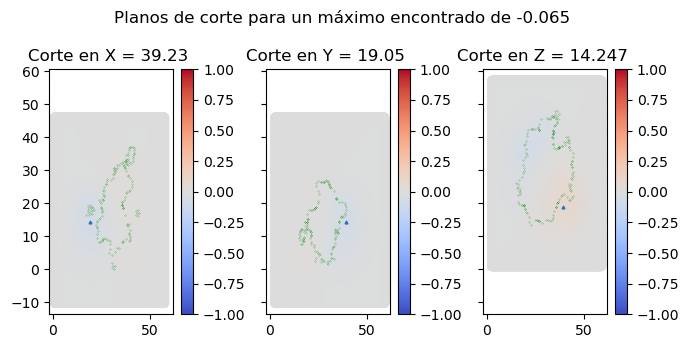

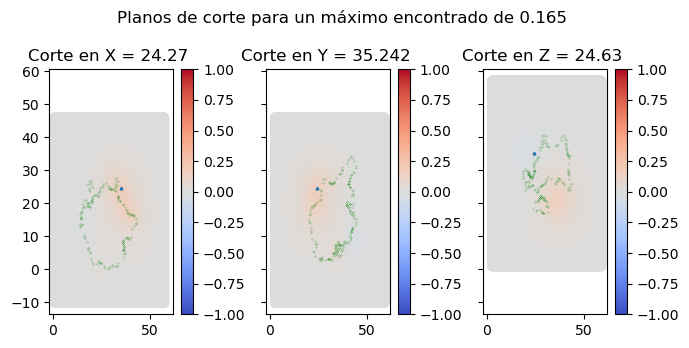

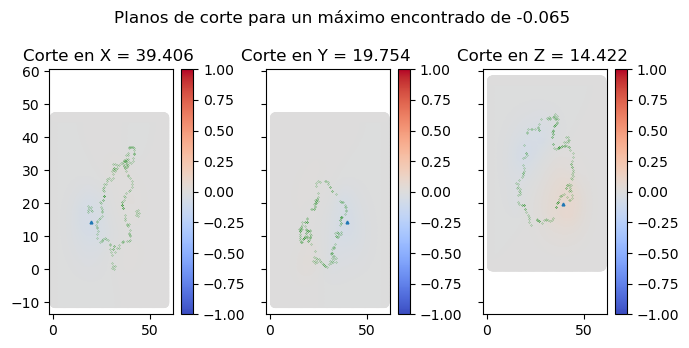

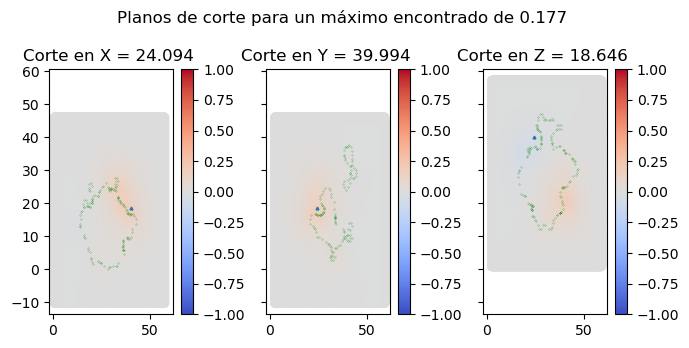

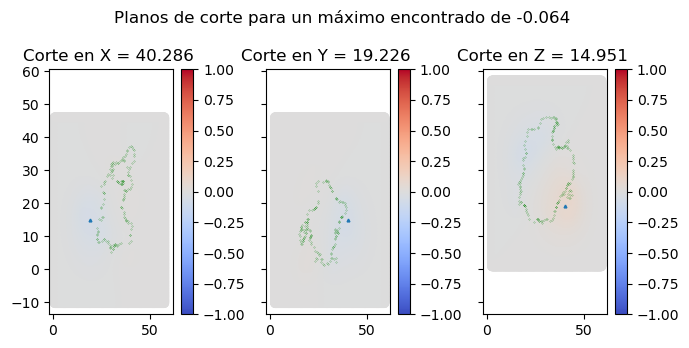

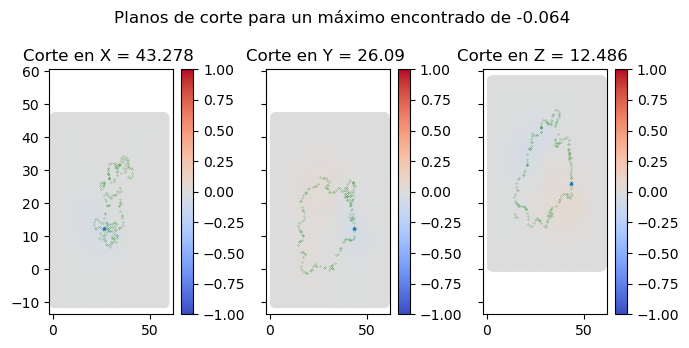

In [12]:
##Código de ploteO
##Condiciones Iniciales
lnl_origen = lnl.origin 
delta = lnl.delta
x = lnl.midpoints[0] 
y = lnl.midpoints[1] 
z = lnl.midpoints[2] 
Yx,Zx = np.meshgrid(y, z)
Xy,Zy = np.meshgrid(x, z)
Xz,Yz = np.meshgrid(x, y)
#Iteración sobre cada valor máximo 
for i in range(len(max_values[0])):
    x_plane, y_plane, z_plane = [],[],[]
    #Clasificación de cada plano de corte en el valor máximo 
    for j in range(len(lnl.grid[0,0,:])):
        x_plane.append(lnl.grid[max_values[0][i],:,j])
        y_plane.append(lnl.grid[:, max_values[1][i],j])
        z_plane.append(lnl.grid[j,:,max_values[2][i]])
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
    ax1, ax2, ax3 = axes.flatten()
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    maximo_0 = lnl.grid[max_values[0][i],max_values[1][i],max_values[2][i]]
    fig.suptitle('Planos de corte para un máximo encontrado de {} '.format(round(maximo_0,3), fontsize=16))
    #Plano de Corte en X 
    plt.subplot(1, 3, 1)
    Eje = max_values[0][i]
    Coord = Eje*delta[0] + lnl_origen[0]
    data = verticesenplano(Coord,True,False,False,"1ubq.vert")
    ax1.set_title("Corte en X = {} ".format(round(Coord,3)))
    plt.plot(data[:,1],data[:,2],'o',markersize=0.15, color = "green")
    plt.plot(max_values[1][i]*delta[1] + lnl_origen[1],max_values[2][i]*delta[2] + lnl_origen[2],marker ="^", markersize = 2)
    ax1 = plt.scatter(Yx,Zx,c=np.array(x_plane), cmap='coolwarm',vmin=-1,vmax=1)
    #plt.plot(data[:,1],data[:,2],'o',markersize=0.25, color = "white")
    plt.colorbar(ax1)
    #Plano de Corte en Y
    plt.subplot(1, 3, 2)
    Eje = max_values[1][i]
    Coord = Eje*delta[1] + lnl_origen[1]
    data = verticesenplano(Coord,False,True,False,"1ubq.vert")
    ax2.set_title("Corte en Y = {} ".format(round(Coord,3)))
    plt.plot(data[:,0],data[:,2],'o',markersize=0.15, color = 'green')
    plt.plot(max_values[0][i]*delta[0] + lnl_origen[0],max_values[2][i]*delta[2] + lnl_origen[2],marker ="^", markersize = 2)
    ax2 = plt.scatter(Xy,Zy,c=np.array(y_plane), cmap='coolwarm',vmin=-1,vmax=1);#plt.imshow(y_plane, cmap="autumn",vmin=np.min(lnl.grid),vmax=np.max(lnl.grid))
    #plt.plot(data[:,0],data[:,2],'o',markersize=0.25, color = 'green')
    plt.colorbar(ax2)
    #Plano de Corte en Z
    plt.subplot(1, 3, 3)
    Eje = max_values[2][i]
    Coord = Eje*delta[2] + lnl_origen[2]
    data = verticesenplano(Coord,False,False,True,"1ubq.vert")
    ax3.set_title("Corte en Z = {} ".format(round(Coord,3)))
    plt.plot(data[:,0],data[:,1],'o',markersize=0.15, color = 'green')
    plt.plot(max_values[0][i]*delta[0] + lnl_origen[0],max_values[1][i]*delta[1] + lnl_origen[1],marker ="^", markersize = 2)
    ax3 = plt.scatter(Xz,Yz,c=np.array(z_plane), cmap='coolwarm',vmin=-1,vmax=1)#plt.imshow(z_plane, cmap="autumn",vmin=np.min(lnl.grid),vmax=np.max(lnl.grid))
    #plt.plot(data[:,0],data[:,1],'o',markersize=0.25, color = 'white')
    plt.colorbar(ax3)
    #Ploteo 
    plt.show()

## MDAnalysis 

In [4]:
u = mda.Universe("1ubq.pdb")
view2 = nv.show_mdanalysis(u)
#d2 = view2.add_component("1ubq-PotTol-l.dx")
#d2.add_surface(isolevel=0, isolevel_type="value", opacity=0.5, contour=False, smooth=1, color="green")
#d2.add_surface(isolevel=800, isolevel_type="value", opacity=0.25, contour=True, smooth=1, color="Black")

view2

NGLWidget()

In [16]:
u = mda.Universe("1ubq.pdb")
view1 = nv.show_mdanalysis(u)
view1.add_representation('ball+stick',
                         selection='resname SOL')
view1

NGLWidget()

In [10]:
view1.render_image()

Image(value=b'', width='99%')

## Cobertura

In [70]:
import numpy as np
from scipy.spatial import ConvexHull

def load_vertices_from_file(filename):
    #with open(filename, "r") as file:
    #    vertices = [list(map(float, line.strip().split())) for line in file.readlines()]
    #return np.array(vertices)
    with open(filename,"r") as archivo:
        data = []
        for linea in archivo:    
            a0,a1,a2= np.float_(linea.replace('   -','    -')[2:].split('    ')[:3]) 
            data.append([a0,a1,a2])
    return np.array(data)

def load_faces_from_file(filename):
    with open(filename, "r") as archivo:
        data = []
        for linea in archivo:    
            a0,a1,a2 = np.int_([x for x in linea.split(" ") if x != ""][:-2])
            data.append([a0,a1,a2])
    return np.array(data)

import numpy as np

def generate_sphere_points(n_points, center, radius):
    points = []
    offset = 2.0 / n_points
    increment = np.pi * (3.0 - np.sqrt(5.0))

    for i in range(n_points):
        y = ((i * offset) - 1) + (offset / 2)
        r = np.sqrt(1 - pow(y, 2))

        phi = ((i + 1) % n_points) * increment

        x = np.cos(phi) * r
        z = np.sin(phi) * r

        points.append(center + radius * np.array([x, y, z]))

    return np.array(points)

def generate_protein_triangles(vertices, faces):
    triangles = []
    for face in faces:
        triangle_vertices = vertices[face - 1]  # Restamos 1 porque la numeración comienza en 1
        triangles.append(triangle_vertices)
    return triangles

def ray_triangle_intersection(ray_origin, ray_direction, triangle_vertices):
    epsilon = 1e-6
    edge1 = triangle_vertices[1] - triangle_vertices[0]
    edge2 = triangle_vertices[2] - triangle_vertices[0]
    h = np.cross(ray_direction, edge2)
    a = np.dot(edge1, h)

    if -epsilon < a < epsilon:
        return None

    f = 1 / a
    s = ray_origin - triangle_vertices[0]
    u = f * np.dot(s, h)

    if u < 0 or u > 1:
        return None

    q = np.cross(s, edge1)
    v = f * np.dot(ray_direction, q)

    if v < 0 or u + v > 1:
        return None

    t = f * np.dot(edge2, q)
    return t if t > epsilon else None


def calculate_coverage_level(point, protein_triangles, n_points, radius):
    sphere_points = generate_sphere_points(n_points, point, radius)

    intersected_rays = 0
    #t_min = float('inf')
    
    for sphere_point in sphere_points:
        ray_direction = sphere_point - point
        #print(point, ray_direction, protein_triangles)
        for triangle in protein_triangles:
            t = ray_triangle_intersection(point, ray_direction, triangle)
            #if t is not None and t < t_min :
            #    t_min = t
            if t is not None and t <= radius:
                intersected_rays += 1
                break

    return intersected_rays / n_points 


In [71]:
# Carga los vértices de la proteína y las caras desde los archivos
protein_filename = "1ubq.vert"
protein_faces_filename = "1ubq.face"
protein_vertices = load_vertices_from_file(protein_filename)
protein_faces = load_faces_from_file(protein_faces_filename)

protein_triangles = generate_protein_triangles(protein_vertices, protein_faces)

In [34]:
# Define el punto de interés y el radio r
point_of_interest = np.array([43.278, 26.09, 12.486])
radius = 3.0
n_points = 200

inicio_tiempo = time.time()
# Calcula el nivel de cobertura
coverage_level= calculate_coverage_level(point_of_interest, protein_triangles,n_points, radius)
fin_tiempo = time.time()
print("Coverage level:", coverage_level)
tiempo_ejecucion = fin_tiempo - inicio_tiempo
print(tiempo_ejecucion, "segundos.")



Coverage level: 0.75
46.95513916015625 segundos.


In [ ]:
#Para el punto [39.23,19.05,14.247] con radio 4.0
coverage = [0.5,0.44,0.46,0.4133,0.45,0.44,0.45,0.45,0.438,0.4466,0.4428,0.4475,0.446]
n_point = [10,25,50,75,100,150,200,300,500,600,800,1000]
#tiempo = [2.15759968,5.917962074279785,11.411240100860596,17.618741750717163,24.38617992401123,34.9372022151947,45.906409740448,69.55688881874084,117.67711853981018,141.80934715270996,186.98684334754944,229.4148907661438 ]

In [6]:
# Define el punto de interés y el radio r
point_of_interest = np.array([43.278, 26.09, 12.486])
radius = [1.0, 2.0, 3.0, 4.0,8.0, 12.0, 16.0] 
n_points = 500

# Calcula el nivel de cobertura
for radiu in radius:
    inicio_tiempo = time.time()
    coverage_level = calculate_coverage_level(point_of_interest, protein_triangles,n_points, radiu)
    #fin_tiempo = time.time()
    print("Coverage level:", coverage_level)
    #tiempo_ejecucion = fin_tiempo - inicio_tiempo
    #print(tiempo_ejecucion, "segundos.")
    print(t_min, "A de distancia")

Coverage level: 1.0
97.73234677314758 segundos.
Coverage level: 1.0
97.37935471534729 segundos.
Coverage level: 1.0
97.48332285881042 segundos.


## Potencial de Coulomb y Derivada

In [72]:
def load_pqr_data(filename):
    with open("1ubq.pqr", "r") as archivo:
        data_pqr = []
        for linea in archivo:
            if linea == "TER\n":
                continue
            elif linea == "END":
                break
            else:
                a0,a1,a2,a3,a4 = np.float_([x for x in linea.split(" ") if x != ""][5:])  
                data_pqr.append([a0,a1,a2,a3,a4])
    return np.array(data_pqr)

def math_calc_dist(p1,p2):
    return math.sqrt(math.pow((p2[0]-p1[0]),2)+math.pow((p2[1]-p1[1]),2)+math.pow((p2[2]-p1[2]),2))

In [73]:
def calcular_potencial_coulomb(punto, pqr_file):
    atoms = load_pqr_data(pqr_file)
    potencial = 0.0
    d_min = float('inf')
    d_with_radiu = float('inf')
    for atom in atoms:
        distancia = math_calc_dist(punto, atom[:3])
        if distancia < d_min :
            d_min = distancia
        auxiliar = distancia - atom[4] #radio de la molécula
        if auxiliar < d_with_radiu :
            d_with_radiu = auxiliar
        potencial += atom[3] / distancia
    
    return potencial, d_min, d_with_radiu

def calcular_norma_derivada_potencial_coulomb(punto, pqr_file, epsilon=0.001):
    #Por diferencias centradas
    potencial_original = calcular_potencial_coulomb(punto, pqr_file)
    #Derivada en x
    punto_anterior = (punto[0] - epsilon, punto[1], punto[2])
    punto_siguiente = (punto[0] + epsilon, punto[1], punto[2])
    potencial_anterior,a,b = calcular_potencial_coulomb(punto_anterior, pqr_file)
    potencial_siguiente,a,b = calcular_potencial_coulomb(punto_siguiente, pqr_file)
    derivada_x = (potencial_siguiente - potencial_anterior) / (2 * epsilon)
    #Derivada en y
    punto_anterior = (punto[0] , punto[1]- epsilon, punto[2])
    punto_siguiente = (punto[0] , punto[1]+ epsilon, punto[2])
    potencial_anterior,a,b = calcular_potencial_coulomb(punto_anterior, pqr_file)
    potencial_siguiente,a,b = calcular_potencial_coulomb(punto_siguiente, pqr_file)
    derivada_y = (potencial_siguiente - potencial_anterior) / (2 * epsilon)
    #Derivada en z
    punto_anterior = (punto[0] , punto[1], punto[2]- epsilon)
    punto_siguiente = (punto[0] , punto[1], punto[2]+ epsilon)
    potencial_anterior,a,b = calcular_potencial_coulomb(punto_anterior, pqr_file)
    potencial_siguiente,a,b = calcular_potencial_coulomb(punto_siguiente, pqr_file)
    derivada_z = (potencial_siguiente - potencial_anterior) / (2 * epsilon)
    #Norma de la derivada
    norma_derivada = (derivada_x**2 + derivada_y**2 + derivada_z**2)**0.5

    return norma_derivada


## Recolección de data, casos puntuales


In [80]:
def tracking(punto):
    lnl_origen = lnl.origin 
    delta = lnl.delta
    Eje = punto[0]
    Coord_x = Eje*delta[0] + lnl_origen[0]
    Eje = punto[1]
    Coord_y = Eje*delta[1] + lnl_origen[1]
    Eje = punto[2]
    Coord_z = Eje*delta[2] + lnl_origen[2]
    return Coord_x,Coord_y,Coord_z 

In [ ]:
#Para un punto específico, como los mínimos y máximos
(array([208, 123, 209, 122, 214, 231]), array([103, 195, 107, 222, 104, 143]), array([139, 198, 140, 164, 143, 129]))

In [57]:
Coulomb, d_min, f = calcular_potencial_coulomb([Coord_x,Coord_y,Coord_z], "1ubq.pqr")
print(Coulomb, d_min, f)

-0.23068596282352283 3.4515376645779154 1.7903376645779154


In [81]:
name = "1ubq" 
punto = np.array(240),np.array(160),np.array(140)
Error = lnl.grid[punto[0],punto[1],punto[2]]
Pot_total_lineal = lineal.grid[punto[0],punto[1],punto[2]]
Pot_reac = reac.grid[punto[0],punto[1],punto[2]]
Coord_x,Coord_y,Coord_z = tracking(punto)

In [140]:
# Define el punto de interés y el radio r
point_of_interest = np.array([Coord_x, Coord_y, Coord_z])
radius = [2.0] 
n_points = 500

#Potencial de Coulomb
Coulomb, d_min, d_with_radiu = calcular_potencial_coulomb(point_of_interest, "1ubq.pqr")
DerCoulomb = calcular_norma_derivada_potencial_coulomb(point_of_interest, "1ubq.pqr", epsilon=0.001)

# Calcula el nivel de cobertura
for radiu in radius:
    inicio_tiempo = time.time()
    coverage_level = calculate_coverage_level(point_of_interest, protein_triangles,n_points, radiu)
    print(name,"",Coord_x,"",Coord_y,"",Coord_z,"",Pot_total_lineal,"",Pot_reac,"",Error,"",Coulomb,"",DerCoulomb,"",d_min,"",d_with_radiu,"",coverage_level,"",radiu)

1ubq  44.861999999999995  29.081999999999994  14.4225  -1.016011  33.006099  -0.039018499999999956  -0.12133846159207291  0.05077052164782963  2.083778839032583  0.5418482095835988  0.42  2.0
1ubq  44.861999999999995  29.081999999999994  14.4225  -1.016011  33.006099  -0.039018499999999956  -0.12133846159207291  0.05077052164782963  2.083778839032583  0.5418482095835988  0.456  3.0
1ubq  44.861999999999995  29.081999999999994  14.4225  -1.016011  33.006099  -0.039018499999999956  -0.12133846159207291  0.05077052164782963  2.083778839032583  0.5418482095835988  0.458  4.0
1ubq  44.861999999999995  29.081999999999994  14.4225  -1.016011  33.006099  -0.039018499999999956  -0.12133846159207291  0.05077052164782963  2.083778839032583  0.5418482095835988  0.458  8.0


## Recolección de data Global

In [87]:
#Máximos locales para npt particiones 
max_values = []
x_v, y_v, z_v = [],[],[]
dime = 321
npt = 3 #número de particiones por lado (2->8 3->27 cubos)
contador = 0
factor = np.floor_divide(dime,npt)
for i in range(0,dime,factor):
    for j in range(0,dime,factor):
        for k in range(0,dime,factor):
            max_local = np.partition(lnl.grid[i:(i+factor),j:(j+factor),k:(k+factor)].flatten(), -5)[-5:][::-1]
            min_local = np.partition(lnl.grid[i:(i+factor),j:(j+factor),k:(k+factor)].flatten(), 5)[:5]
            for local in max_local:
                a = np.where(lnl.grid == local)
                punto = np.array([a[0][0],a[1][0],a[2][0]])
                print(kappa.grid[punto[0],punto[1],punto[2]])
                    #if abs(local) > 1e-3:
                    #    print(punto)
                        #break
            for local in min_local:
                #a = np.where(lnl.grid == local)
                if abs(local) > 1e-3:
                    contador += 1
                    break                  

1.0


IndexError: index 222 is out of bounds for axis 1 with size 129

In [89]:
print(kappa.grid[150,150,150])

IndexError: index 150 is out of bounds for axis 0 with size 129

In [ ]:
maxx = np.max(lnl.grid)  #**
            minn = np.min(lnl.grid)  #**
            if max_local>=0.80*maxx: #sumar e-16 --
                b,n,m = np.where(lnl.grid == max_local)  #**
                x_v.append(int(b))
                y_v.append(int(n))
                z_v.append(int(m))
            if min_local<=0.8*minn:
                b,n,m = np.where(lnl.grid == min_local)  #**
                x_v.append(int(b))
                y_v.append(int(n))
                z_v.append(int(m))
max_values = np.array(x_v),np.array(y_v),np.array(z_v)
print(max_values)